In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

### Load Data

In [2]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 50, noise = 0.2, random_state=42)

In [3]:
X.shape, y.shape

((50, 2), (50,))

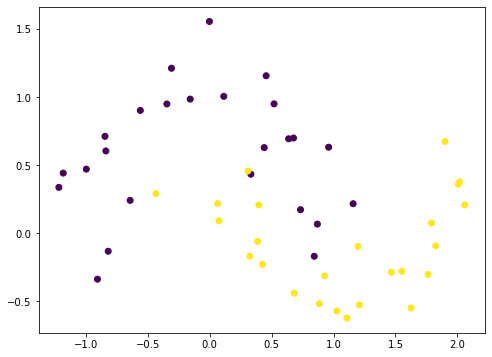

In [4]:
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y)

### Add Bias

In [5]:
def add_bias(arr):
    arr = np.concatenate((arr, np.ones((arr.shape[0],1))), axis=1)
    return arr

In [6]:
X = add_bias(X)

In [7]:
# check the shape, we want a shape of (50,3) for our input features
X.shape

(50, 3)

### Define activation function

In [8]:
def sigmoid(X):
    s = 1 / (1+np.exp(-X))
    return s

##### Test if you have the correct function with following code

In [9]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

### Weights
Initialize them randomly
- HOW MANY: 3x2 for the input layer w1, w2, bias into the hidden layer and 3x1 from the hidden layer into the output layer
- SHAPE: 
    - First layer (3,2): 3 weights flow into two neurons
    - Hidden layer (3,1): 3 weights flow into one neuron

In [10]:
weights_h = np.random.random((3,2))
weights_o = np.random.random((3,1))

In [11]:
weights_h

array([[0.52466434, 0.37562743],
       [0.75042348, 0.71114096],
       [0.41622692, 0.50312321]])

In [12]:
weights_o

array([[0.1480979 ],
       [0.3478903 ],
       [0.07329076]])

In [13]:
X.shape, weights_h.shape

((50, 3), (3, 2))

In [14]:
np.dot(X,weights_h)

array([[ 1.07205264,  1.14389603],
       [ 0.53161673,  0.47764862],
       [ 0.77985621,  0.79952446],
       [ 1.41299718,  1.22981039],
       [ 0.50558854,  0.69082648],
       [ 1.92021633,  1.69714094],
       [ 0.52274006,  0.59516706],
       [ 0.40618693,  0.54657378],
       [ 0.46813514,  0.50055147],
       [ 0.25943373,  0.43285227],
       [ 1.22970851,  1.26029674],
       [ 1.39439926,  1.31330095],
       [ 0.97203924,  0.85135415],
       [ 1.40146296,  1.37365453],
       [ 0.93085492,  0.90166615],
       [ 0.91589694,  0.93627843],
       [ 0.8592338 ,  0.72511018],
       [ 1.75926714,  1.53039406],
       [ 1.74047565,  1.51390468],
       [ 0.79788479,  0.93311996],
       [ 1.29576845,  1.25438308],
       [ 1.16259104,  1.24810457],
       [-0.31317598, -0.07765852],
       [ 0.44414385,  0.44658315],
       [ 0.5740475 ,  0.60570048],
       [ 0.73241898,  0.7001493 ],
       [ 1.11480696,  0.95077275],
       [ 0.61386074,  0.68260993],
       [ 0.52637825,

In [15]:
def feed_forward(X, weights):

    """
    1. Calculate the dot product of X
       and the weights of the first layer.

    2. Apply the sigmoid function on the result.

    3. Append an extra column of ones to the result (i.e. the bias).

    4. Calculate the dot product of the previous step
       with the weights of the second (i.e. outer) layer.

    5. Apply the sigmoid function on the result.

    6. Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """
    
    weighted_sum = np.dot(X,weights[0])
    output_1 = sigmoid(weighted_sum)
    input_out = add_bias(output_1)
    weighted_sum = np.dot(input_out,weights[1])
    output_2 = sigmoid(weighted_sum)
    
    return output_1, output_2

### Assertion Test

In [16]:
out1, out2 = feed_forward(X, [weights_h, weights_o])
assert out1.shape == (50, 2)
assert out2.shape == (50, 1)

Xref = np.array([[1.0, 2.0, 1.0]])
whidden = np.array([[1.0, 2.0, 0.0],
                 [-1.0, -2.0, 0.0]
                    ]).T
wout = np.array([[1.0, -1.0, 0.5]]).T

out1, out2 = feed_forward(Xref, [whidden, wout])
assert np.all(out1.round(2) == np.array([[0.99, 0.01]]))
assert np.all(out2.round(2) == np.array([[0.82]]))

In [17]:
out_hidden_layer, y_pred = feed_forward(X, [weights_h, weights_o])

##### Plot result

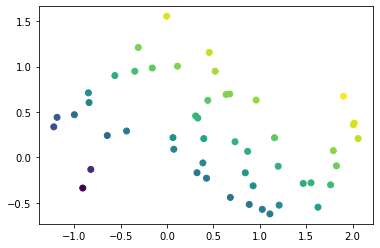

In [18]:
plt.scatter(X[:,0], X[:,1], c = y_pred)

#### Accuracy
- flatten both ytrue and ypred (so that they're both (50,) arrays)
- round the ypred (either up to 1 or down to 0)
- then compare them to eachother to get a boolean array (True where the values are the same, False where they are not)
- sum the boolean array and divide by the length (i.e. take the mean)

In [19]:
def get_accuracy(ypred,ytrue):
    acc = sum(ytrue.flatten() == ypred.flatten().round().astype(np.int64))
    return acc/len(ytrue)

In [20]:
get_accuracy(y_pred, y)

0.5

--> we're predicting whatever because the weights aren't fitted yet!